In [1]:
import math, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(context='paper')
%matplotlib inline

In [2]:
def set_fonts(ax, title):
    ax.set_title(title, fontsize=18)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)

In [3]:
means_1 = (0,0)
covs = [[1, 0], [0, 1]]
normal_1 = np.random.multivariate_normal(means_1, covs, 1000)

In [4]:
means_2 = (6,5)
normal_2 = np.random.multivariate_normal(means_2, covs, 1000)

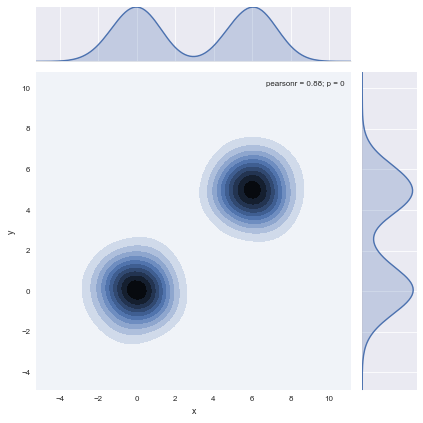

In [5]:
X = np.concatenate((normal_1, normal_2))
df = pd.DataFrame(X, columns=['x', 'y'])
graph = sns.jointplot(x="x", y="y", data=df, kind="kde")

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [8]:
y = np.concatenate((np.zeros((1000,1), dtype=np.int64), np.ones((1000,1), dtype=np.int64)))
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
logReg = LogisticRegression().fit(X,y)

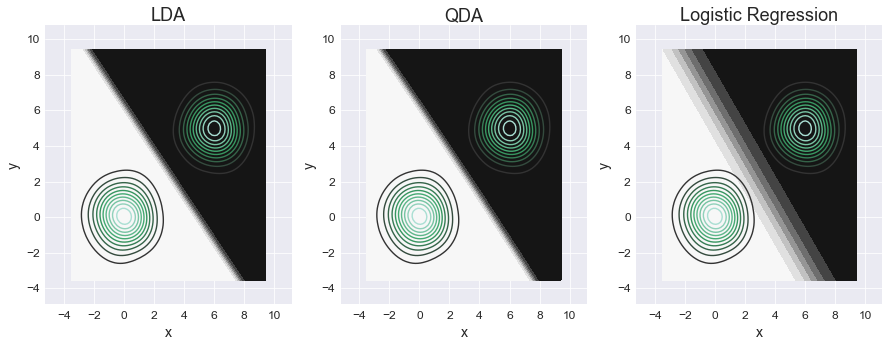

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

Z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[0])
axs[0].contourf(xx,yy,Z_lda)
set_fonts(axs[0], "LDA")

Z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[1])
axs[1].contourf(xx,yy,Z_qda)
set_fonts(axs[1], "QDA")

Z_log = logReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[2])
axs[2].contourf(xx,yy,Z_log)
set_fonts(axs[2], "Logistic Regression")

In [10]:
covs_1 = [[.6, 1.2], [1.2, .6]]
normal_1b = np.random.multivariate_normal(means_1, covs_1, 1000)

In [11]:
means_3 = (1,1)
rota_matrix = [[-1, 0], [0, -1]]
covs_2 = np.matmul(rota_matrix, covs_1)
normal_2b = np.random.multivariate_normal(means_3, covs_2, 1000)

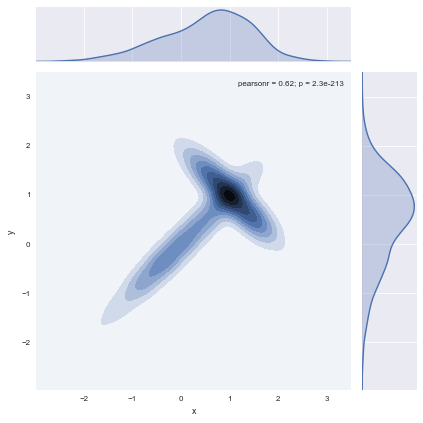

In [12]:
X = np.concatenate((normal_1b, normal_2b))
df = pd.DataFrame(X, columns=['x', 'y'])
sns.jointplot(x="x", y="y", data=df, kind="kde")

In [13]:
y = np.concatenate((np.zeros((1000,1), dtype=np.int64), np.ones((1000,1), dtype=np.int64)))
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
logReg = LogisticRegression().fit(X, y)

In [14]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

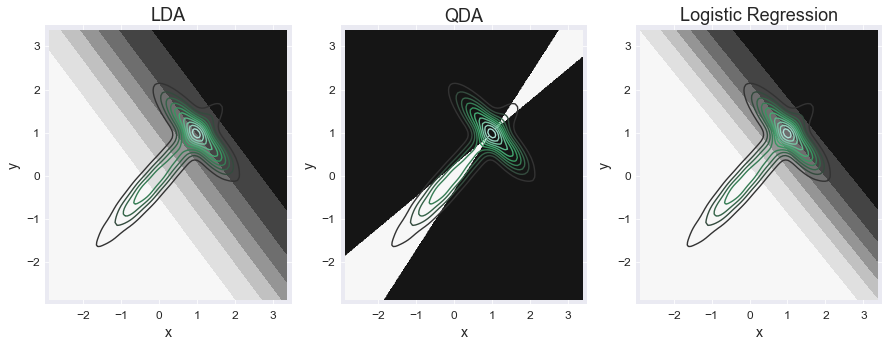

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

Z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[0])
axs[0].contourf(xx,yy,Z_lda)
set_fonts(axs[0], "LDA")

Z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[1])
axs[1].contourf(xx,yy,Z_qda)
set_fonts(axs[1], "QDA")

Z_log = logReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[2])
axs[2].contourf(xx,yy,Z_log)
set_fonts(axs[2], "Logistic Regression")

In [16]:
lam = 1.0
lam2 = 2.0
lam3 = 5.0
poisson_1 = np.reshape(np.random.poisson(lam, 1000), (1000, 1))
poisson_2 = np.reshape(np.random.poisson(lam, 1000), (1000, 1))
poisson_3 = np.add(np.reshape(np.random.poisson(lam2, 1000), (1000, 1)), [1])
poisson_4 = np.add(np.reshape(np.random.poisson(lam3, 1000), (1000, 1)), [1])
joint_poisson_1 = np.append(poisson_1, poisson_2, axis=1)
joint_poisson_2 = np.matmul(np.append(poisson_3, poisson_4, axis=1), rota_matrix)

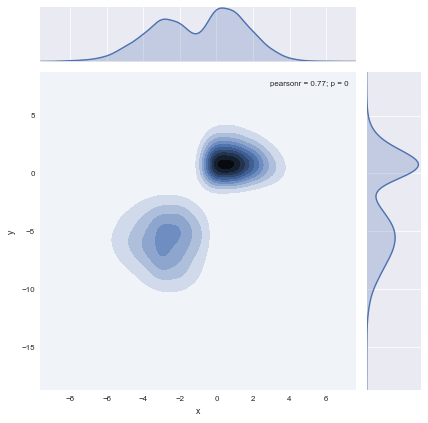

In [17]:
X = np.concatenate((joint_poisson_1, joint_poisson_2))
df = pd.DataFrame(X, columns=['x', 'y'])
graph = sns.jointplot(x="x", y="y", data=df, kind="kde")

In [18]:
y = np.concatenate((np.zeros((1000,1), dtype=np.int64), np.ones((1000,1), dtype=np.int64)))
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
logReg = LogisticRegression().fit(X, y)

In [19]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

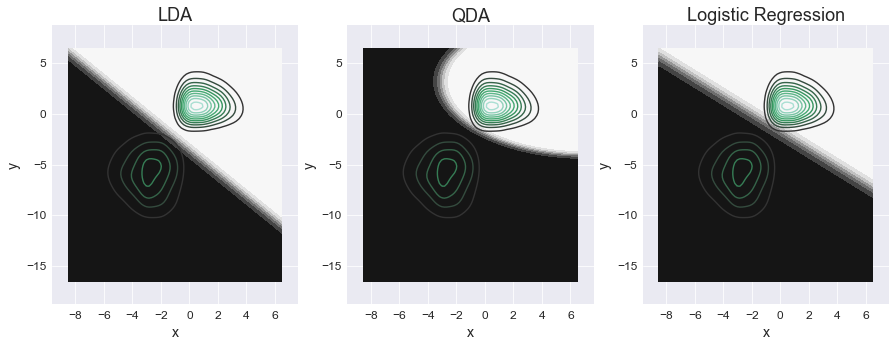

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

Z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[0])
axs[0].contourf(xx,yy,Z_lda)
set_fonts(axs[0], "LDA")

Z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[1])
axs[1].contourf(xx,yy,Z_qda)
set_fonts(axs[1], "QDA")

Z_log = logReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[2])
axs[2].contourf(xx,yy,Z_log)
set_fonts(axs[2], "Logistic Regression")

In [31]:
lam = 1.0
lam2 = 3.0
poisson_1 = np.reshape(np.random.poisson(lam, 50), (50, 1))
poisson_2 = np.reshape(np.random.poisson(lam2, 50), (50, 1))
poisson_3 = np.add(np.reshape(np.random.poisson(lam, 50), (50, 1)), [-4])
poisson_4 = np.add(np.reshape(np.random.poisson(lam2, 50), (50, 1)), [-4])
joint_poisson_1 = np.append(poisson_1, poisson_2, axis=1)
joint_poisson_2 = np.matmul(np.append(poisson_3, poisson_4, axis=1), rota_matrix)

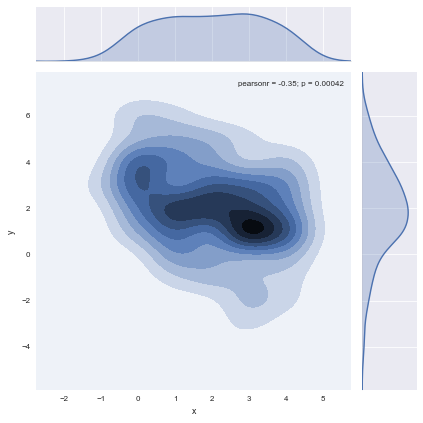

In [32]:
X = np.concatenate((joint_poisson_1, joint_poisson_2))
df = pd.DataFrame(X, columns=['x', 'y'])
graph = sns.jointplot(x="x", y="y", data=df, kind="kde")

In [33]:
y = np.concatenate((np.zeros((50,1), dtype=np.int64), np.ones((50,1), dtype=np.int64)))
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
logReg = LogisticRegression().fit(X, y)

In [34]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

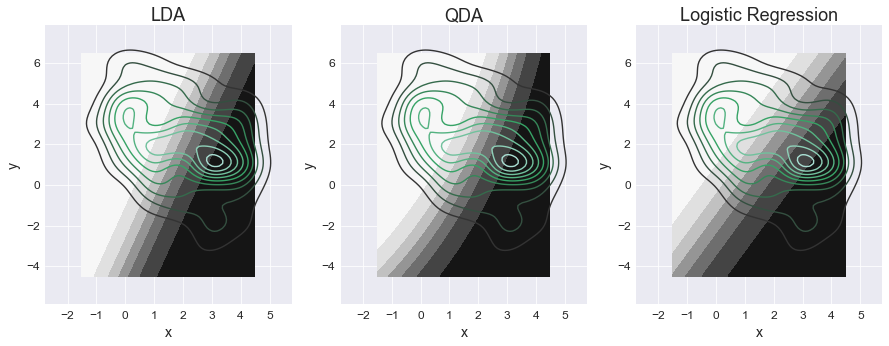

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

Z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[0])
axs[0].contourf(xx,yy,Z_lda)
set_fonts(axs[0], "LDA")

Z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[1])
axs[1].contourf(xx,yy,Z_qda)
set_fonts(axs[1], "QDA")

Z_log = logReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log[:, 1].reshape(xx.shape)
sns.kdeplot(df.x, df.y, ax=axs[2])
axs[2].contourf(xx,yy,Z_log)
set_fonts(axs[2], "Logistic Regression")